In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-12.867126276377803 133.5817217490423
-27.02085266683683 77.02450409122139
-46.27268906800647 -58.27107756479204
45.20761731337501 -175.1112686713366
45.706873388277046 81.02652987655318
-56.71301495957188 -93.61897162344515
-7.554018907705554 -162.93480660764334
26.058030313147256 73.91900048535544
67.6813751737287 -120.85803652495242
68.60935893395148 -23.88498048310575
-2.9677008640429676 -30.11307620797254
35.30223662604102 -44.784532895331495
-5.431955257829628 160.4851873697835
84.60254993290957 29.169247334752413
42.90120255079944 -122.31501274048026
-44.39820387775028 -3.2886616983489034
-23.537924802890743 165.9507814120156
68.22740354500218 44.435759789583756
78.66551151170924 -68.48709116728516
-36.986095366770755 -1.8007670129053395
62.96849525303162 -130.07884476347706
47.255386382209906 15.024351283849825
-74.07020232573257 86.3111293176712
-50.64335356076774 -37.98490307987501
-14.884101329256552 -14.752192193815375
89.62081549302826 154.44592577669022
-62.13480377242355

79.16814213331469 178.56948884159345
-88.56220814623448 -169.80432914099748
51.607791063625626 -164.59814892445326
-33.25205304128044 145.79508816923908
80.4382136058573 -134.4858054046697
-10.603376489428825 -1.0665930384837452
33.364301816113596 -93.2699397677419
-3.07021806277848 35.08343682330016
-85.89921876014056 71.71039359149887
-66.72879334724087 -71.54551305935743
8.577457948407783 67.88808398736415
43.55886350112431 -10.432976723999445
-48.11281166536984 17.251726384369874
-21.734649687460305 10.2858051045136
29.117814495075223 74.5339107110712
-0.4842829582152888 173.8421156675622
35.56784104512684 31.82029978030201
16.18941828831555 -87.5113036971294
5.614725709453481 50.40231984530661
20.39165226308326 69.17492514307068
75.5484154695273 -83.69257763118833
-58.361676996921446 64.70557658744826
-62.75233879441511 -93.742732364069
-74.39545512588498 47.318954366765325
-65.35061855833834 -107.08632214580642
-58.355844603701044 -142.18083008372133
-54.64522336478087 -80.649267

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | jabiru
City not found. Skipping...
Processing Record 2 of Set 13 | bambous virieux
Processing Record 3 of Set 13 | viedma
Processing Record 4 of Set 13 | provideniya
Processing Record 5 of Set 13 | sarkand
Processing Record 6 of Set 13 | punta arenas
Processing Record 7 of Set 13 | samusu
City not found. Skipping...
Processing Record 8 of Set 13 | raipur
Processing Record 9 of Set 13 | norman wells
Processing Record 10 of Set 13 | bolungarvik
City not found. Skipping...
Processing Record 11 of Set 13 | touros
Processing Record 12 of Set 13 | torbay
Processing Record 13 of Set 13 | buala
Processing Record 14 of Set 13 | mehamn
Processing Record 15 of Set 13 | central point
Processing Record 16 of Set 13 | saldanha
Processing Record 17 of Set 13 | noumea
Processing Record 18 of Set 13 | kamenka
Processing Record 19 of Set 13 | narsaq
Processing Record 20 of Set 13 | luderitz
Processing Record 21 o

Processing Record 33 of Set 16 | elliot
Processing Record 34 of Set 16 | asfi
Processing Record 35 of Set 16 | natitingou
Processing Record 36 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 16 | morden
Processing Record 38 of Set 16 | oistins
Processing Record 39 of Set 16 | baiyin
Processing Record 40 of Set 16 | krasnobrodskiy
Processing Record 41 of Set 16 | hailey
Processing Record 42 of Set 16 | oranjemund
Processing Record 43 of Set 16 | nantucket
Processing Record 44 of Set 16 | saint anthony
Processing Record 45 of Set 16 | bairiki
Processing Record 46 of Set 16 | bemidji
Processing Record 47 of Set 16 | lebu
Processing Record 48 of Set 16 | vardo
Processing Record 49 of Set 16 | hot springs
Processing Record 50 of Set 16 | hambantota
Processing Record 1 of Set 17 | deputatskiy
Processing Record 2 of Set 17 | goderich
Processing Record 3 of Set 17 | jizan
Processing Record 4 of Set 17 | sitka
Processing Record 5 of Set 17 | geraldton
Processing

Processing Record 20 of Set 20 | mubi
Processing Record 21 of Set 20 | kruisfontein
Processing Record 22 of Set 20 | saint-pierre
Processing Record 23 of Set 20 | laguna
Processing Record 24 of Set 20 | dong xoai
Processing Record 25 of Set 20 | ponta delgada
Processing Record 26 of Set 20 | puerto leguizamo
Processing Record 27 of Set 20 | shingu
Processing Record 28 of Set 20 | mount gambier
Processing Record 29 of Set 20 | lorengau
Processing Record 30 of Set 20 | brande
Processing Record 31 of Set 20 | dekar
Processing Record 32 of Set 20 | zinder
Processing Record 33 of Set 20 | itarema
Processing Record 34 of Set 20 | palma
Processing Record 35 of Set 20 | grand-lahou
Processing Record 36 of Set 20 | zhigalovo
Processing Record 37 of Set 20 | barra patuca
Processing Record 38 of Set 20 | ridgecrest
Processing Record 39 of Set 20 | azimur
City not found. Skipping...
Processing Record 40 of Set 20 | acambay
Processing Record 41 of Set 20 | fernie
Processing Record 42 of Set 20 | zy

Processing Record 3 of Set 24 | birjand
Processing Record 4 of Set 24 | dingle
Processing Record 5 of Set 24 | barcelos
Processing Record 6 of Set 24 | irbit
Processing Record 7 of Set 24 | dawson creek
Processing Record 8 of Set 24 | waingapu
Processing Record 9 of Set 24 | maryville
Processing Record 10 of Set 24 | flinders
Processing Record 11 of Set 24 | baherden
Processing Record 12 of Set 24 | carmo do paranaiba
Processing Record 13 of Set 24 | tarrafal
Processing Record 14 of Set 24 | husavik
Processing Record 15 of Set 24 | tabuk
Processing Record 16 of Set 24 | novotalitsy
City not found. Skipping...
Processing Record 17 of Set 24 | uaua
Processing Record 18 of Set 24 | iskateley
Processing Record 19 of Set 24 | hamamatsu
Processing Record 20 of Set 24 | marzuq
Processing Record 21 of Set 24 | fairbanks
Processing Record 22 of Set 24 | kirov
Processing Record 23 of Set 24 | te anau
Processing Record 24 of Set 24 | almaznyy
Processing Record 25 of Set 24 | xuddur
Processing Rec

In [21]:
total_cities = city_data.["city"].len()

SyntaxError: invalid syntax (3055267574.py, line 1)

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,66.45,94,75,6.91,MU,2022-08-01 20:20:24
1,Viedma,-40.8135,-62.9967,56.80,46,100,7.31,AR,2022-08-01 20:20:24
2,Provideniya,64.3833,-173.3000,44.71,87,75,6.71,RU,2022-08-01 20:20:24
3,Sarkand,45.4100,79.9186,64.04,62,33,6.91,KZ,2022-08-01 20:20:24
4,Punta Arenas,-53.1500,-70.9167,46.51,66,75,18.41,CL,2022-08-01 20:17:05
5,Raipur,21.2333,81.6333,82.63,71,100,4.52,IN,2022-08-01 20:20:25
6,Norman Wells,65.2820,-126.8329,71.64,43,20,9.22,CA,2022-08-01 20:20:25
7,Touros,-5.1989,-35.4608,78.31,77,10,14.88,BR,2022-08-01 20:20:26
8,Torbay,47.6666,-52.7314,81.88,50,75,9.22,CA,2022-08-01 20:16:18
9,Buala,-8.1450,159.5921,79.54,79,48,7.58,SB,2022-08-01 20:20:26


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2022-08-01 20:20:24,-20.3428,57.7575,66.45,94,75,6.91
1,Viedma,AR,2022-08-01 20:20:24,-40.8135,-62.9967,56.80,46,100,7.31
2,Provideniya,RU,2022-08-01 20:20:24,64.3833,-173.3000,44.71,87,75,6.71
3,Sarkand,KZ,2022-08-01 20:20:24,45.4100,79.9186,64.04,62,33,6.91
4,Punta Arenas,CL,2022-08-01 20:17:05,-53.1500,-70.9167,46.51,66,75,18.41
5,Raipur,IN,2022-08-01 20:20:25,21.2333,81.6333,82.63,71,100,4.52
6,Norman Wells,CA,2022-08-01 20:20:25,65.2820,-126.8329,71.64,43,20,9.22
7,Touros,BR,2022-08-01 20:20:26,-5.1989,-35.4608,78.31,77,10,14.88
8,Torbay,CA,2022-08-01 20:16:18,47.6666,-52.7314,81.88,50,75,9.22
9,Buala,SB,2022-08-01 20:20:26,-8.1450,159.5921,79.54,79,48,7.58


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/02/22'

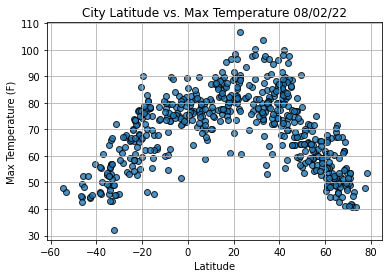

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

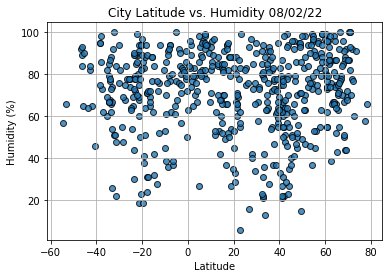

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

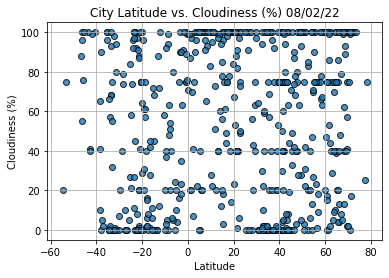

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

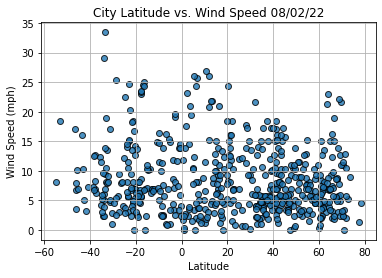

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()